In [1]:
from numpy.random import rand, randint
from numpy import sign

class Perceptron:
    
    def __init__(self, 
                 n, 
                 activation = lambda x: 1 if x > 0 else -1, 
                 random_weights = False, 
                 la = 0.1):
        
        self.la = la
        self.activation = lambda x: activation(self.calc(x))
        if random_weights:
            self.w = [rand() for i in range(n)]
            return
        self.w = [0 for i in range(n)]
        
    def calc(self, arr):
        return sum(arr[i] * self.w[i] for i in range(len(self.w)))
    
    def learn(self, problem, answer):
        if self.activation(problem) != answer:
            for i in range(len(self.w)):
                self.w[i] += self.la * problem[i] * answer
                
    def learning(self, arr, iters = 100):
        for i in range(iters):
            for problem, answer in arr:
                self.learn(problem, answer)

In [16]:
def makeTest(n):
    test = []
    for i in range(n):
        test.append([(randint(-10, 10), randint(-10, 10))])
        new = sign(test[-1][0][0] - test[-1][0][1])
        test[-1].append(new if new != 0 else -1)
    return test
test = makeTest(100)
for i in range(10):
    print(test[i])

[(1, -10), 1]
[(4, 4), -1]
[(-2, -5), 1]
[(5, -8), 1]
[(-7, -7), -1]
[(8, -1), 1]
[(-6, 6), -1]
[(1, -6), 1]
[(-1, 1), -1]
[(-3, 8), -1]


In [17]:
p_sign = Perceptron(2)
p_sign.learning(test, iters = 100)
print("Weights: ", p_sign.w)
print(f"Result of (5, 4): {p_sign.activation((5, 4))}")
print(f"Result of (1.5, 1): {p_sign.activation((1.5, 1))}")
print(f"Result of (15, 17): {p_sign.activation((15, 17))}")
print(f"Result of (14.25, 15.8): {p_sign.activation((14.25, 15.8))}")

Weights:  [6.200000000000001, -6.200000000000001]
Result of (5, 4): 1
Result of (1.5, 1): 1
Result of (15, 17): -1
Result of (14.25, 15.8): -1


In [4]:
from numpy import dot, exp

class Neuron0:
    
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + exp(-x))

    def feedforward(self, inputs):
        out = dot(self.weights, inputs) + self.bias
        return self.sigmoid(out)

Neuron0([1, 1], 0).feedforward([-1, 1])

0.5

In [5]:
class NeuralNetwork0:
    
    def __init__(self, weights = [0, 1], bias = 0):
        self.h1 = Neuron0(weights, bias)
        self.h2 = Neuron0(weights, bias)
        self.o1 = Neuron0(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o1 = self.o1.feedforward([out_h1, out_h2])
        return out_o1

NeuralNetwork0().feedforward([2, 3])

0.7216325609518421

In [6]:
from numpy import zeros, array, tanh

class Neuron1:
    
    def __init__(self, weights, bias, func):
        self.weights = weights
        self.bias = bias
        self.activate = func

    def feedforward(self, inputs):
        out = dot(self.weights, inputs) + self.bias
        return self.activate(out)

class NeuralNetwork1:
    
    def __init__(self,
                 n_inp = 2, n_mid = 3, n_out = 1, 
                 random_weights = False, 
                 weights = False, bias = False,
                 func = "sigmoid"):
        self.h = [0] * n_mid
        self.out = [0] * n_out
        
        if func == "sigmoid":
            self.func = self.sigmoid
            self.deriviative = self.derSigm
        elif func == "tanh":
            self.func = self.tanh_
            self.deriviative = self.derTanh
        elif func == "ReLU":
            self.func = self.ReLU
            self.deriviative = self.derReLU
        else:
            print("ERROR: wrong func")
        
        if random_weights:
            
            for i in range(n_mid):
                self.h[i] = Neuron1(rand(1, n_inp)[0], rand(), self.func)
                
            for i in range(n_out):
                self.out[i] = Neuron1(rand(1, n_mid)[0], rand(), self.func)
            
        else:
            
            for i in range(n_mid):
                self.h[i] = Neuron1(weights, bias, self.func)
            for i in range(n_out):
                self.out[i] = Neuron1(weights, bias, self.func)

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + exp(-x))
    
    @staticmethod
    def tanh_(x):
        return tanh(x)
    
    @staticmethod
    def ReLU(x):
        return max(0, x)
    
    def derSigm(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def derTanh(self, x):
        return 1 - self.tanh_(x) ** 2
    
    @staticmethod
    def derReLU(x):
        return 1
    
    def feedforward(self, x):
        first = [neuron.feedforward(x) for neuron in self.h]
        second = [neuron.feedforward(first) for neuron in self.out]
        return second

In [7]:
Sigmoid = NeuralNetwork1(n_inp = 2, n_mid = 1, n_out = 1, random_weights = True)
#print("Sigmoid.h ->", Sigmoid.h)
print("len(Sigmoid.h) ->", len(Sigmoid.h))
print("Sigmoid.h[0].weights ->", Sigmoid.h[0].weights)
print("Sigmoid.h[0].bias ->", Sigmoid.h[0].bias, end = "\n\n")

#print("Sigmoid.out ->", Sigmoid.out)
print("len(Sigmoid.out) ->", len(Sigmoid.out))
print("Sigmoid.out[0].weights ->", Sigmoid.out[0].weights)
print("Sigmoid.out[0].bias ->", Sigmoid.out[0].bias, end = "\n\n")

print("Sigmoid.func ->", Sigmoid.func, end = "\n\n")

print("result of [5, 5]", Sigmoid.feedforward([5, 5]))

len(Sigmoid.h) -> 1
Sigmoid.h[0].weights -> [0.04015287 0.29960891]
Sigmoid.h[0].bias -> 0.691184705153216

len(Sigmoid.out) -> 1
Sigmoid.out[0].weights -> [0.69954835]
Sigmoid.out[0].bias -> 0.7797103352713739

Sigmoid.func -> <function NeuralNetwork1.sigmoid at 0x7fcda21da310>

result of [5, 5] [0.8054229552482212]


In [8]:
Tanh = NeuralNetwork1(n_inp = 3, n_mid = 3, n_out = 1, weights = [0.5] * 3, bias = 0, func = "tanh")
#print("Tanh.h ->", Tanh.h)
print("len(Tanh.h) ->", len(Tanh.h))
print("Tanh.h[0].weights ->", Tanh.h[0].weights)
print("Tanh.h[0].bias ->", Tanh.h[0].bias, end = "\n\n")

#print("Tanh.out ->", Tanh.out)
print("len(Tanh.out) ->", len(Tanh.out))
print("Tanh.out[0].weights ->", Tanh.out[0].weights)
print("Tanh.out[0].bias ->", Tanh.out[0].bias, end = "\n\n")

print("Tanh.func ->", Tanh.func)
print("result of [5, 5, 5]", Tanh.feedforward([5, 5, 5]))

len(Tanh.h) -> 3
Tanh.h[0].weights -> [0.5, 0.5, 0.5]
Tanh.h[0].bias -> 0

len(Tanh.out) -> 1
Tanh.out[0].weights -> [0.5, 0.5, 0.5]
Tanh.out[0].bias -> 0

Tanh.func -> <function NeuralNetwork1.tanh_ at 0x7fcda21da3a0>
result of [5, 5, 5] [0.9051480878090389]


In [9]:
ReLU = NeuralNetwork1(n_inp = 2, n_mid = 2, n_out = 2, weights = [1, 0], bias = 1, func = "ReLU")
#print("ReLU.h ->", ReLU.h)
print("len(ReLU.h) ->", len(ReLU.h))
print("ReLU.h[0].weights ->", ReLU.h[0].weights)
print("ReLU.h[0].bias ->", ReLU.h[0].bias, end = "\n\n")

#print("ReLU.out ->", ReLU.out)
print("len(ReLU.out) ->", len(ReLU.out))
print("ReLU.out[0].weights ->", ReLU.out[0].weights)
print("ReLU.out[0].bias ->", ReLU.out[0].bias, end = "\n\n")

print("ReLU.func ->", ReLU.func)
print("result of [5, 5]", ReLU.feedforward([5, 5]))

len(ReLU.h) -> 2
ReLU.h[0].weights -> [1, 0]
ReLU.h[0].bias -> 1

len(ReLU.out) -> 2
ReLU.out[0].weights -> [1, 0]
ReLU.out[0].bias -> 1

ReLU.func -> <function NeuralNetwork1.ReLU at 0x7fcda21da430>
result of [5, 5] [7, 7]


In [10]:
from sklearn.datasets import load_digits, load_boston
from sklearn.model_selection import train_test_split

digits = load_digits()
x_digits, y_digits = digits.data, digits.target
print("shape", x_digits.shape)

x_train, x_test, y_train, y_test = train_test_split(x_digits, y_digits, test_size = 0.1)
print("train/test sizes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

shape (1797, 64)
train/test sizes: (1617, 64) (180, 64) (1617,) (180,)


In [11]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
y_pred = mlp_classifier.predict(x_test)
print("y_test", y_test[:10])
print("y_pred", y_pred[:10])

print("Train accuracy:", mlp_classifier.score(x_train, y_train))
print("Test accuracy:", mlp_classifier.score(x_test, y_test))

y_test [6 4 1 6 8 9 5 5 8 7]
y_pred [6 4 1 8 8 8 5 5 8 7]
Train accuracy: 1.0
Test accuracy: 0.9611111111111111


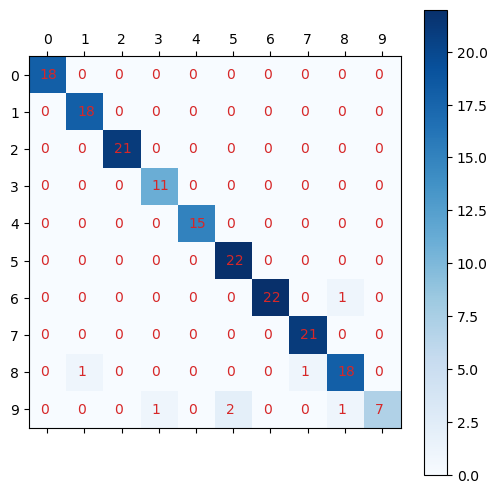

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(x_test, y_pred):
    conf_mat = confusion_matrix(x_test, y_pred)
    fig = plt.figure(figsize = (6, 6))
    plt.matshow(conf_mat, cmap = plt.cm.Blues, fignum = 1)
    plt.xticks(range(10), range(10))
    plt.yticks(range(10), range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j][i]), color = "tab:red")

plot_confusion_matrix(y_test, mlp_classifier.predict(x_test))

In [13]:
from pandas import read_csv

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
d = list(set(df["Embarked"]))
d_new = dict()
for i in range(len(d)):
    d_new[d[i]] = i
d = df["Embarked"].replace(d_new)
df["Embarked"] = d
df = df.replace({"male" : 1, "female" : 0})
df = df.replace("NaN", 0)
df = df.drop(columns = ["Name", "Ticket", "Cabin"])
df = df.fillna(0)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
888,889,0,3,0,0.0,1,2,23.4500,0
889,890,1,1,1,26.0,0,0,30.0000,2


In [15]:
x, y = df.drop(columns = ["Survived"]), df["Survived"]
print("shape", x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.03)
print("train/test sizes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
y_pred = mlp_classifier.predict(x_test)
print("y_test", array(y_test))
print("y_pred", y_pred)

print("Train accuracy:", mlp_classifier.score(x_train, y_train))
print("Test accuracy:", mlp_classifier.score(x_test, y_test))

shape (891, 8)
train/test sizes: (864, 8) (27, 8) (864,) (27,)
y_test [0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1]
y_pred [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1]
Train accuracy: 0.7870370370370371
Test accuracy: 0.7037037037037037


In [16]:
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
df = read_csv(url)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [17]:
from sklearn.neural_network import MLPRegressor

x, y = df.drop(columns = ["Salary"]), df["Salary"]
print("shape", x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print("train/test sizes:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)


mlp_regressor = MLPRegressor(learning_rate_init = 10, max_iter = 500)
mlp_regressor.fit(x_train, y_train)
y_pred = mlp_regressor.predict(x_test)
print("y_test", array(y_test))
print("y_pred", y_pred)

print("Train accuracy:", mlp_regressor.score(x_train, y_train))
print("Test accuracy:", mlp_regressor.score(x_test, y_test))

shape (30, 1)
train/test sizes: (24, 1) (6, 1) (24,) (6,)
y_test [ 55794.  98273.  56642.  57189. 112635. 122391.]
y_pred [ 63367.13123458  91737.46552976  53299.40187192  60621.66221707
 114617.12944535 121023.43534172]
Train accuracy: 0.9492304139014489
Test accuracy: 0.9729381062866858
